In [1]:
from pathlib import Path

In [2]:
model_root= Path("/mnt/share/vbs-power-line-fault-detection/models/")

In [3]:
cvs = list(model_root.glob("**/cv*"))

In [4]:
model_root = list(set([cv_path.parent for cv_path in cvs]))

In [5]:
model_root[:10]

[PosixPath('/mnt/share/vbs-power-line-fault-detection/models/hierarchical_gru/summary/window_400_step_200_not_scaled'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/senet/resnet_50/summary_not_scaled/aug_summary_window_40_step_20_ratio_1'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/aug/percentile_summary_window_5000_step_5000'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/summary_not_scaled/hidden_64_window_5000_summary'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/senet/resnet_50/summary_window_40_step_20'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/fft/fft_5000_pca_200'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/hierarchical_gru_context/summary_not_scaled/window_200_step_200'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/cnn/attention/multiple_dropouts/layer_8_summary_window_40_step_20'),
 PosixPath('/mnt/share/v

In [6]:
len(model_root)

42

In [7]:
model_cvs = {  str(model_path.relative_to(Path("/mnt/share/vbs-power-line-fault-detection/models"))) : list(model_path.glob("cv*/result.csv")) for model_path in model_root}

In [8]:
import pandas as pd

In [9]:
model_cvs = { model_name: { path.parent.name : pd.read_csv(path) for path in cv_paths } for model_name, cv_paths in model_cvs.items()}

In [10]:
result_table = pd.DataFrame({ "epoch": list(range(400))})

In [11]:
result_table.shape

(400, 1)

In [12]:
import numpy as np

In [13]:
for model_name, cvs in model_cvs.items():
    if len(cvs) == 0:
        result_table[model_name] = np.NaN
        continue
    cv_keys = sorted(cvs.keys())
    for n_cv in cv_keys:
        df = cvs[n_cv]
        for col in df.columns[1:]:
            result_table["{}-{}-{}".format(model_name, n_cv, col)] = df[col]

In [14]:
result_table.shape

(400, 915)

In [15]:
result_table[:10]

,epoch,hierarchical_gru/summary/window_400_step_200_not_scaled-cv0-train_loss,hierarchical_gru/summary/window_400_step_200_not_scaled-cv0-train_score,hierarchical_gru/summary/window_400_step_200_not_scaled-cv0-valid_loss,hierarchical_gru/summary/window_400_step_200_not_scaled-cv0-valid_score,hierarchical_gru/summary/window_400_step_200_not_scaled-cv1-train_loss,hierarchical_gru/summary/window_400_step_200_not_scaled-cv1-train_score,hierarchical_gru/summary/window_400_step_200_not_scaled-cv1-valid_loss,hierarchical_gru/summary/window_400_step_200_not_scaled-cv1-valid_score,hierarchical_gru/summary/window_400_step_200_not_scaled-cv2-train_loss,...,cnn/attention/layer_3_dilation_summary_window_40_step_20-cv2-valid_score,cnn/attention/layer_3_dilation_summary_window_40_step_20-cv3-train_loss,cnn/attention/layer_3_dilation_summary_window_40_step_20-cv3-train_score,cnn/attention/layer_3_dilation_summary_window_40_step_20-cv3-valid_loss,cnn/attention/layer_3_dilation_summary_window_40_step_20-cv3-valid_score,cnn/attention/layer_3_dilation_summary_window_40_step_20-cv4-train_loss,cnn/attention/layer_3_dilation_summary_window_40_step_20-cv4-train_score,cnn/attention/layer_3_dilation_summary_window_40_step_20-cv4-valid_loss,cnn/attention/layer_3_dilation_summary_window_40_step_20-cv4-valid_score,cnn/attention/avg_window_10_step_5
0,0,0.322940,-0.012990,0.229115,0.000000,0.317818,0.000000,0.226982,0.000000,0.314146,...,0.029443,0.542191,0.027801,0.595102,0.000000,0.483102,0.064019,0.543612,0.000000,NaN
1,1,0.227061,0.000000,0.226680,0.000000,0.227626,0.000000,0.213494,0.000000,0.227287,...,-0.049770,0.286890,-0.005313,0.412484,0.000000,0.258661,0.000000,0.445540,0.000000,NaN
2,2,0.206510,0.147897,0.182550,0.331017,0.174709,0.090894,0.176400,0.121446,0.202161,...,0.000000,0.239146,0.026756,0.227814,0.000000,0.236061,0.000000,0.268143,0.000000,NaN
3,3,0.168696,0.346494,0.124528,0.584712,0.132226,0.528090,0.142624,0.553728,0.152233,...,0.000000,0.227716,0.000000,0.225206,-0.010532,0.225485,0.000000,0.220327,0.000000,NaN
4,4,0.119272,0.630230,0.142262,0.453379,0.124004,0.632691,0.163683,0.587252,0.138777,...,0.000000,0.226068,-0.010632,0.224273,0.000000,0.219060,0.000000,0.224294,0.000000,NaN
5,5,0.120200,0.631972,0.108515,0.499737,0.126462,0.558141,0.141427,0.553728,0.121750,...,0.000000,0.230406,-0.005313,0.218596,0.000000,0.212805,-0.009206,0.208606,0.000000,NaN
6,6,0.109219,0.639622,0.086338,0.665930,0.118504,0.646486,0.127952,0.605062,0.117446,...,0.000000,0.224191,0.000000,0.207261,0.000000,0.206403,0.065402,0.309059,0.241350,NaN
7,7,0.107357,0.671136,0.098184,0.644689,0.111696,0.669855,0.133509,0.628026,0.112548,...,0.000000,0.226980,0.000000,0.229243,0.000000,0.203629,0.118963,0.253276,0.153860,NaN
8,8,0.097555,0.671883,0.089806,0.665930,0.112322,0.690371,0.122905,0.605062,0.098650,...,0.000000,0.228058,0.000000,0.213862,0.000000,0.213464,0.125112,0.257194,0.117209,NaN
9,9,0.095800,0.729349,0.107812,0.592439,0.103046,0.682900,0.121575,0.635032,0.100602,...,0.000000,0.214507,0.181340,0.211990,0.183600,0.213592,-0.009206,0.204993,0.183600,NaN


In [16]:
max_loss_scores = pd.DataFrame(result_table.max(axis=0))

In [17]:
max_loss_scores

,0
epoch,399.000000
hierarchical_gru/summary/window_400_step_200_not_scaled-cv0-train_loss,0.322940
hierarchical_gru/summary/window_400_step_200_not_scaled-cv0-train_score,0.871663
hierarchical_gru/summary/window_400_step_200_not_scaled-cv0-valid_loss,0.229115
hierarchical_gru/summary/window_400_step_200_not_scaled-cv0-valid_score,0.780858
hierarchical_gru/summary/window_400_step_200_not_scaled-cv1-train_loss,0.317818
hierarchical_gru/summary/window_400_step_200_not_scaled-cv1-train_score,0.897208
hierarchical_gru/summary/window_400_step_200_not_scaled-cv1-valid_loss,0.226982
hierarchical_gru/summary/window_400_step_200_not_scaled-cv1-valid_score,0.775513
hierarchical_gru/summary/window_400_step_200_not_scaled-cv2-train_loss,0.314146


In [18]:
result_summary_df = pd.DataFrame()

In [19]:
import re

In [20]:
pattern = re.compile(r"^(.+)\-(cv\d+.+)$")

In [21]:
for row in max_loss_scores.iterrows():
    score_name = pattern.match(row[0])
    if score_name:
        result_summary_df.loc[score_name.group(1), score_name.group(2)] = row[1][0] 

In [22]:
score_columns = {
    "train_loss": [col for col in result_summary_df.columns if "train_loss" in col],
    "train_score": [col for col in result_summary_df.columns if "train_score" in col],
    "valid_loss": [col for col in result_summary_df.columns if "valid_loss" in col],
    "valid_score": [col for col in result_summary_df.columns if "valid_score" in col]
}    

In [23]:
import numpy as np

In [24]:
def calc_metric_avg(row, metric):
    return np.mean([row[col] for col in score_columns[metric] if not pd.isna(row[col])])

In [25]:
for i, metric in enumerate(score_columns.keys()):
    result_summary_df.insert(i, column="avg_" + metric, value=result_summary_df.apply(lambda row: calc_metric_avg(row, metric), axis=1)) 

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [26]:
def calc_metric_std(row, metric):
    return np.std([row[col] for col in score_columns[metric] if not pd.isna(row[col])])

In [27]:
for i, metric in enumerate(score_columns.keys()):
    result_summary_df.insert(i + 4, column="std_" + metric, value=result_summary_df.apply(lambda row: calc_metric_std(row, metric), axis=1)) 

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [28]:
result_summary_df[:]

,avg_train_loss,avg_train_score,avg_valid_loss,avg_valid_score,std_train_loss,std_train_score,std_valid_loss,std_valid_score,cv0-train_loss,cv0-train_score,...,cv17-valid_loss,cv17-valid_score,cv18-train_loss,cv18-train_score,cv18-valid_loss,cv18-valid_score,cv19-train_loss,cv19-train_score,cv19-valid_loss,cv19-valid_score
hierarchical_gru/summary/window_400_step_200_not_scaled,0.319461,0.861980,0.233244,0.779564,0.009162,0.031834,0.016902,0.043065,0.322940,0.871663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bigru_attention/aug/percentile_summary_window_5000_step_5000,0.313448,0.462684,0.280180,0.416230,0.038331,0.350808,0.020005,0.340069,0.290149,0.811479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bigru_attention/summary_not_scaled/hidden_64_window_5000_summary,0.483277,0.708790,0.306542,0.723654,0.040211,0.034579,0.022723,0.078952,0.515960,0.700405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
senet/resnet_50/summary_window_40_step_20,0.312379,1.000000,1.855660,0.658595,0.023176,0.000000,1.915678,0.032534,0.329943,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bigru_attention/fft/fft_5000_pca_200,0.415902,0.884047,0.487686,0.739679,0.022946,0.031771,0.234495,0.053287,0.379081,0.896213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hierarchical_gru_context/summary_not_scaled/window_200_step_200,0.234700,0.892255,0.198373,0.764055,0.021208,0.048667,0.034106,0.054785,0.268165,0.888453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cnn/attention/multiple_dropouts/layer_8_summary_window_40_step_20,0.290833,0.989492,1.940456,0.750008,0.025082,0.009919,1.862379,0.033872,0.286987,0.973667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cnn/attention/summary_window_40_step_20,0.350880,0.884825,1.065231,0.796874,0.033801,0.037087,0.364564,0.047879,0.336568,0.907607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
senet/resnet_50/summary_not_scaled/summary_window_40_step_20,0.212835,0.842580,0.530715,0.770448,0.011840,0.040616,0.381423,0.040493,0.223189,0.850183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
senet/resnet_50/avg_window_8_step_4,0.239619,0.504033,0.703677,0.471758,0.000000,0.000000,0.000000,0.000000,0.239619,0.504033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
result_summary_df.to_csv("result_summary.csv")

# plot losses

In [30]:
import matplotlib.pyplot as plt

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e79297b8>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e7768160>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e75deef0>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e7486eb8>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e729d940>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e71ced30>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e7031f28>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e6ec8470>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e6ce2da0>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e6b78518>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e69ff7b8>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e68985c0>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e66b0e10>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e655d9e8>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e6499780>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e6309240>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e6167160>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e602cda0>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e5f09ef0>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e5d28630>,
      dtype=object)

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e5bfd518>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e5d2a4e0>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e593c2b0>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e5807d68>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e5668b00>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e5548630>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e53d65f8>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e528e048>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e5085da0>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e4f26080>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e4e09128>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e4cda0f0>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e4b33ef0>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e4a09a20>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e48c5a20>,
      dtype=object)

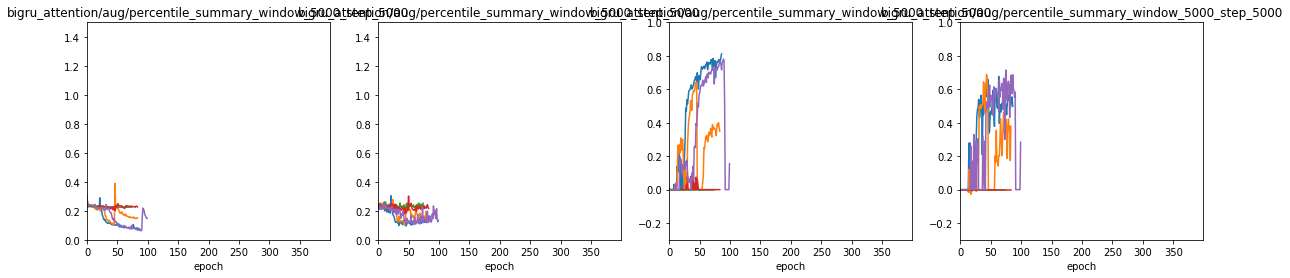

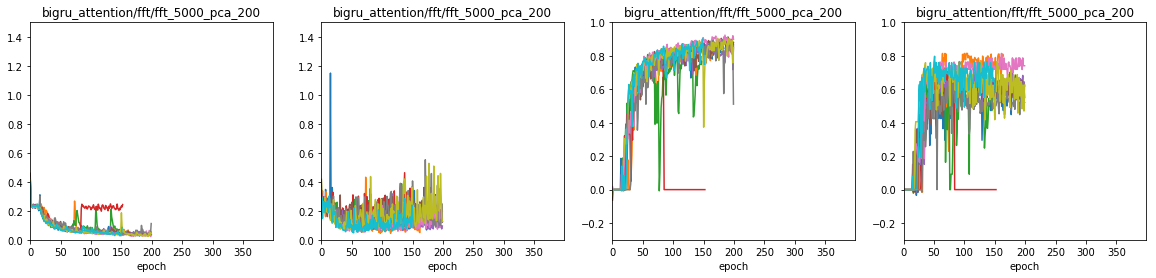

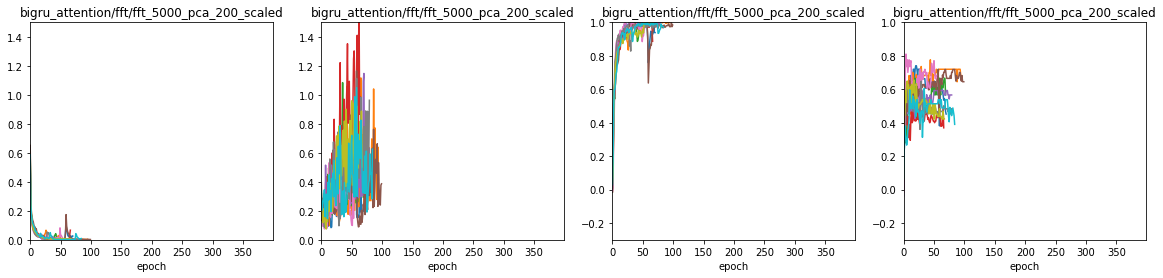

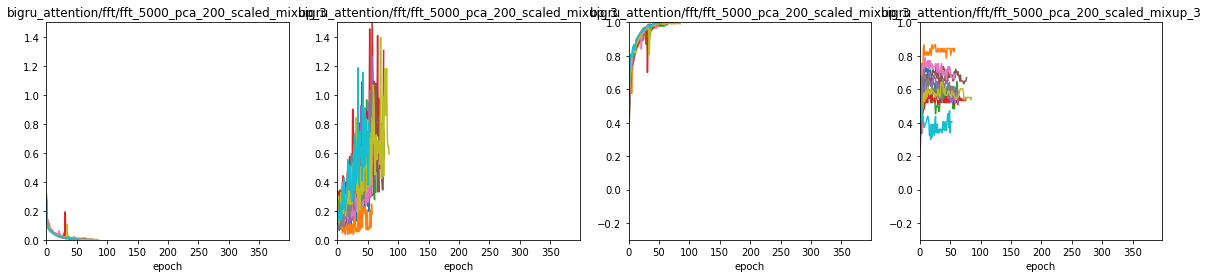

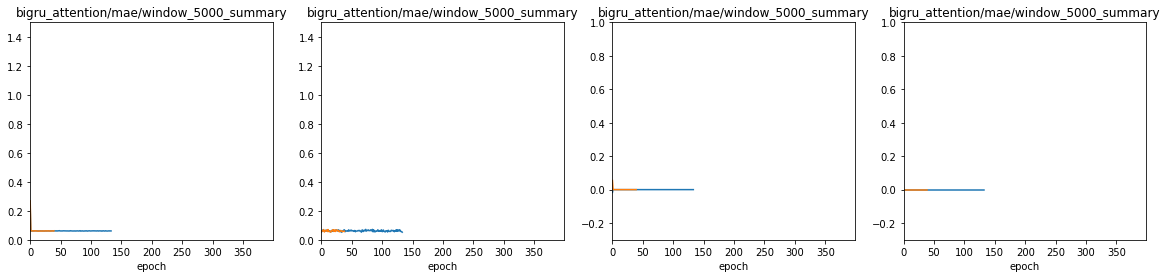

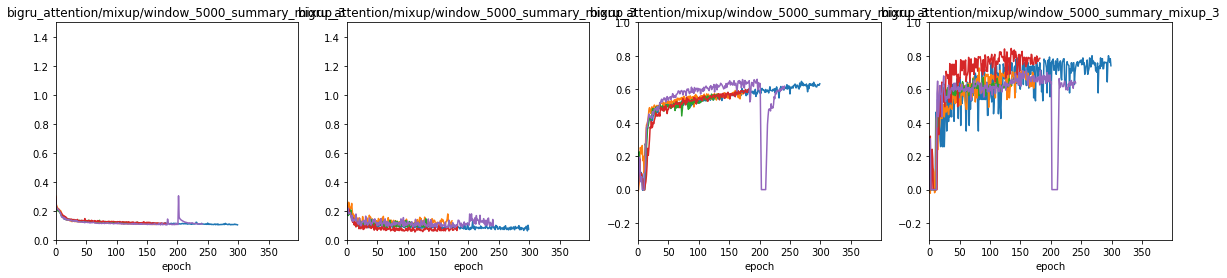

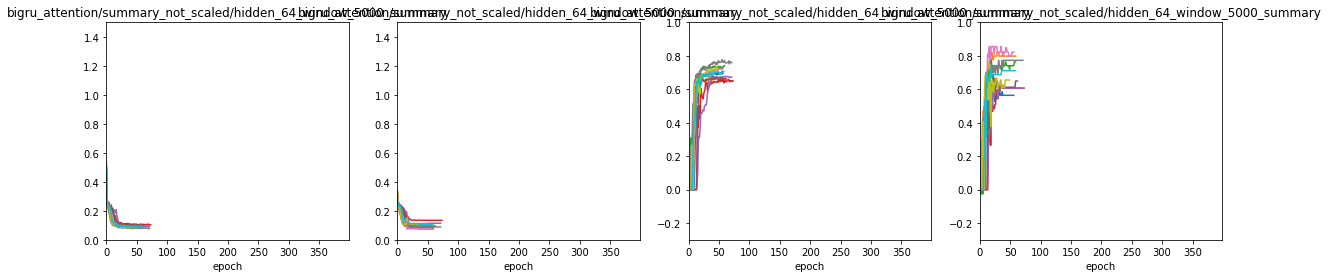

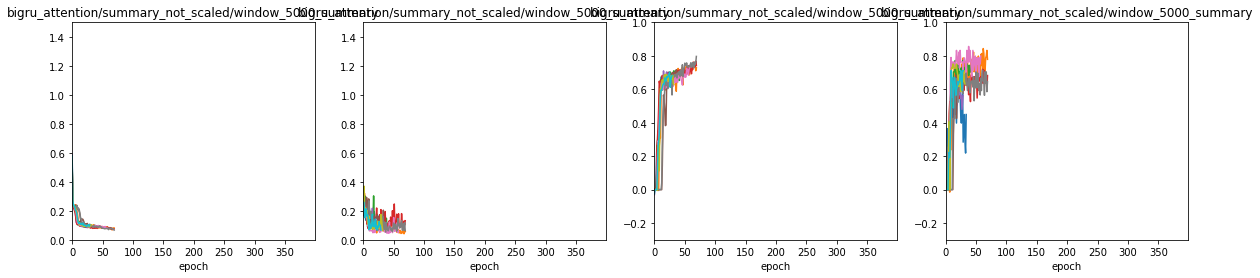

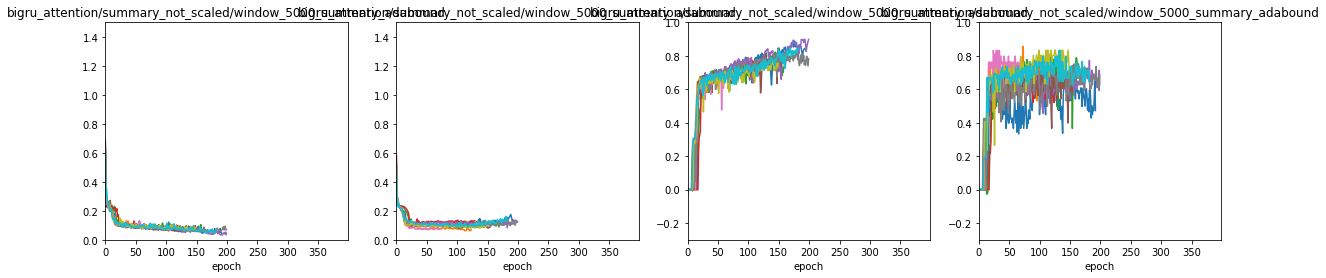

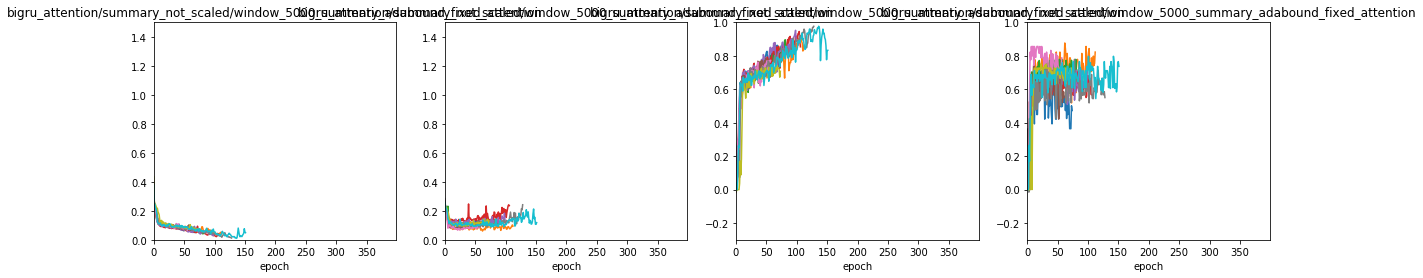

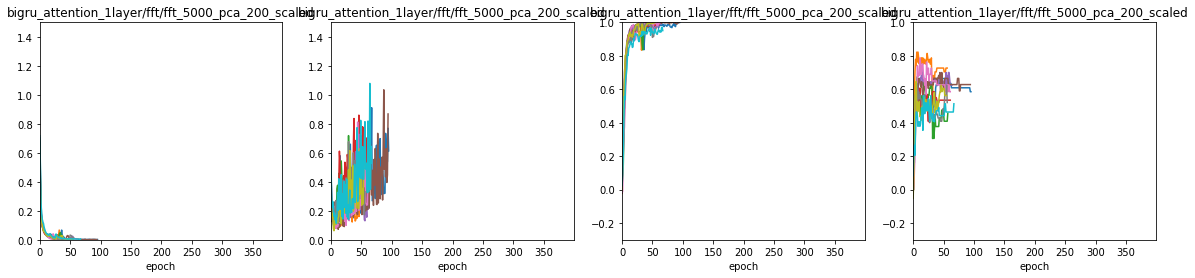

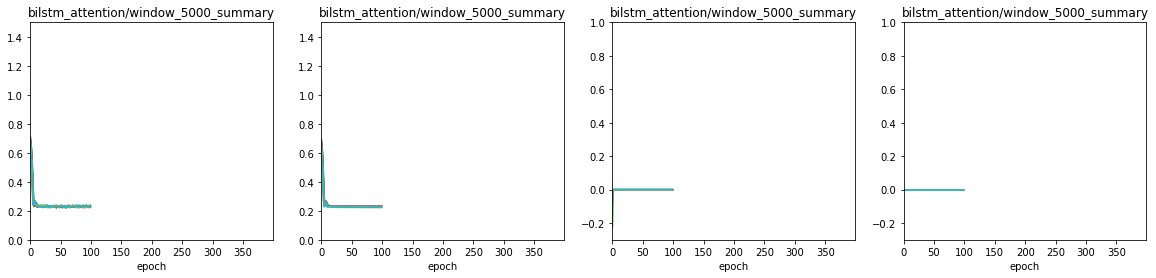

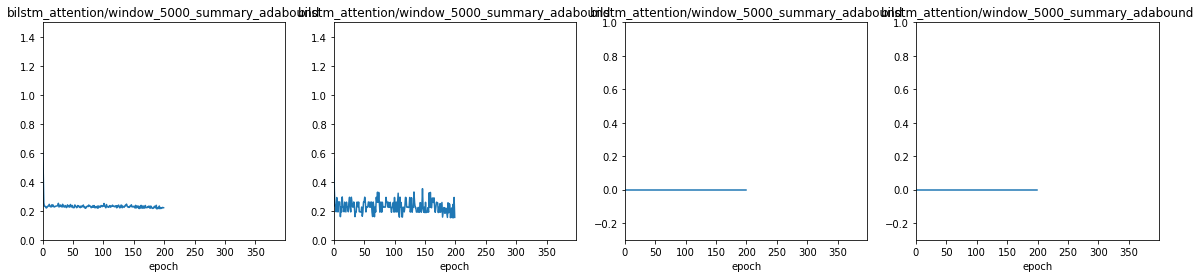

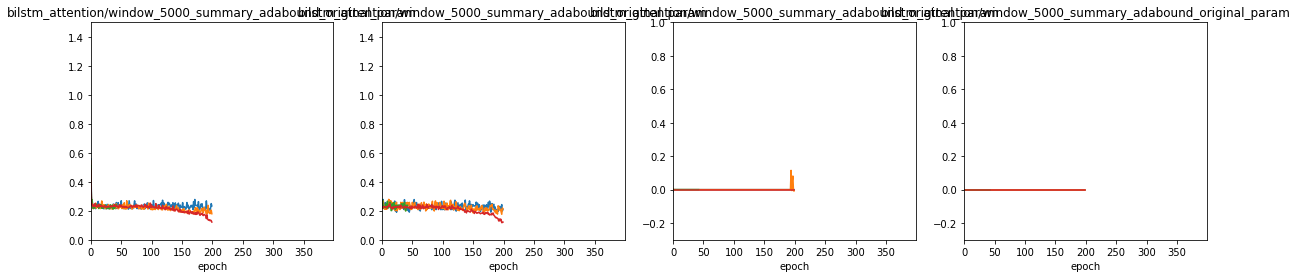

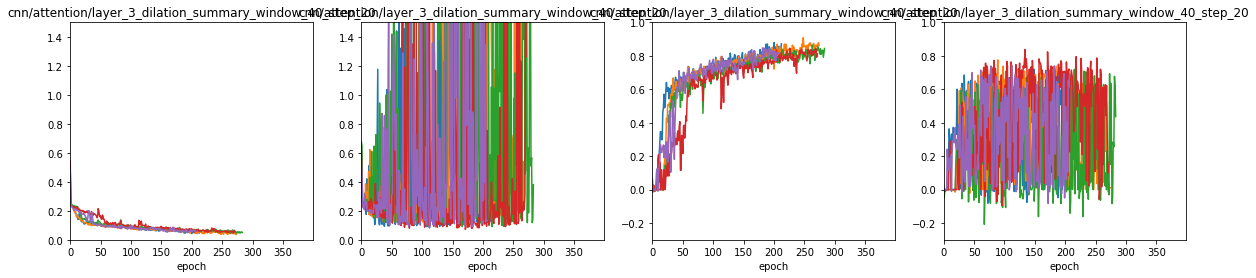

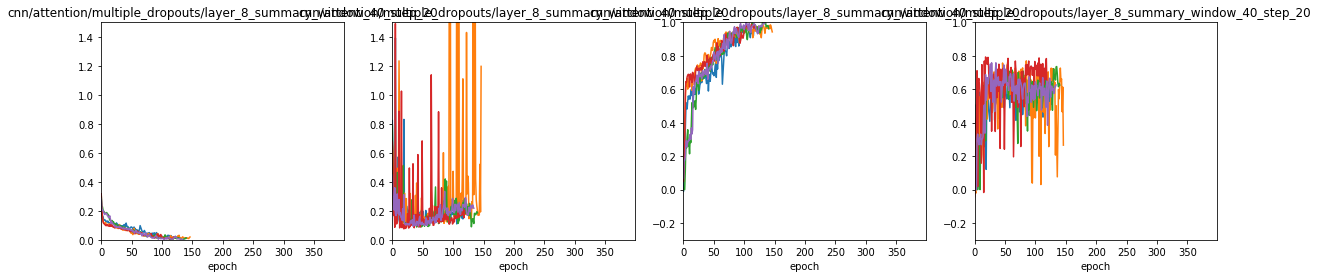

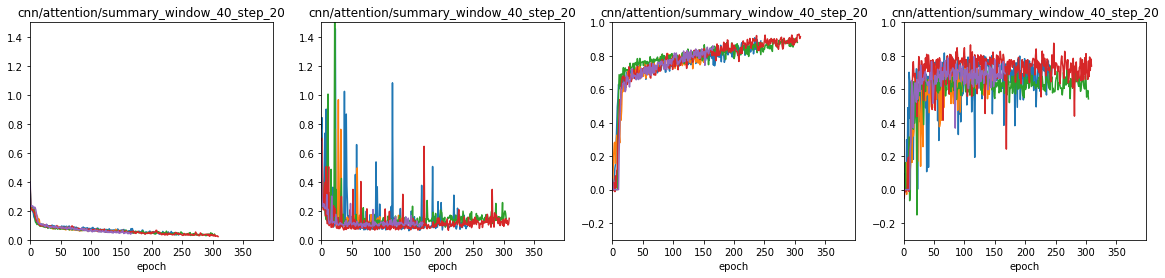

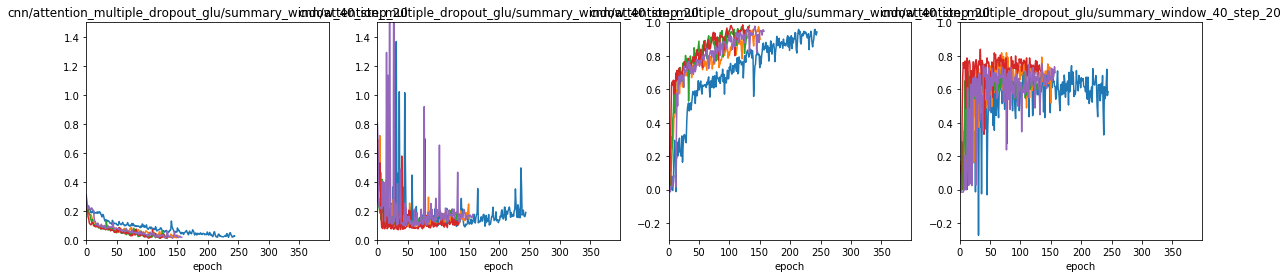

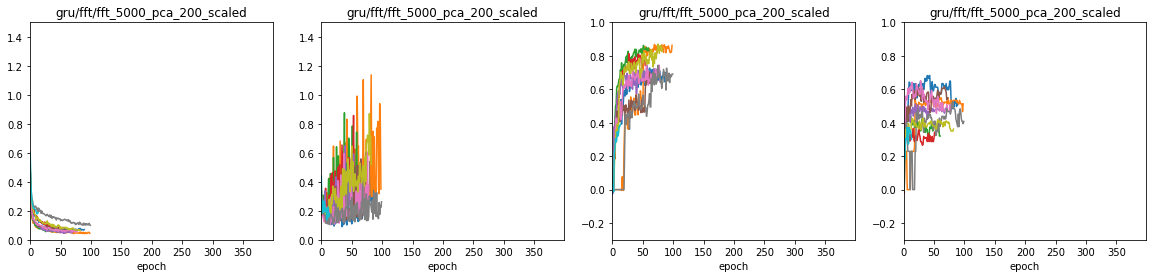

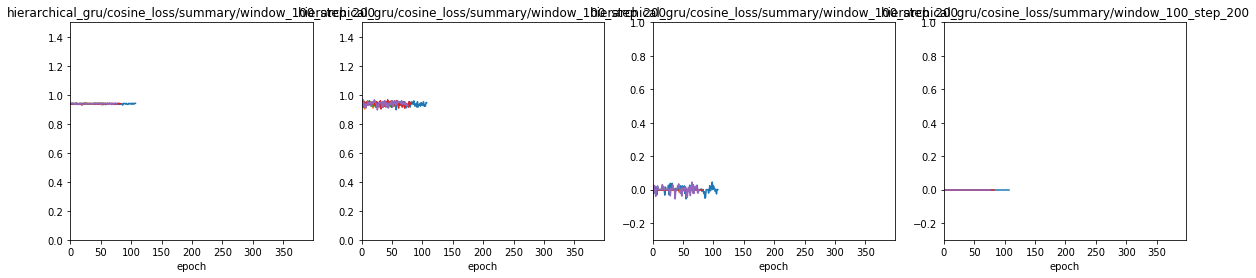

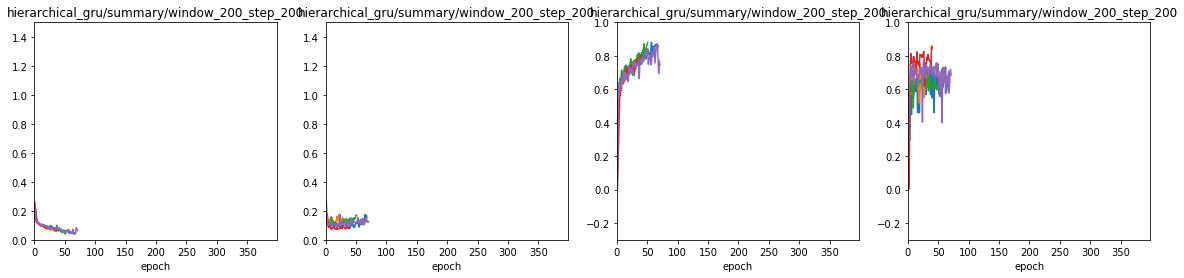

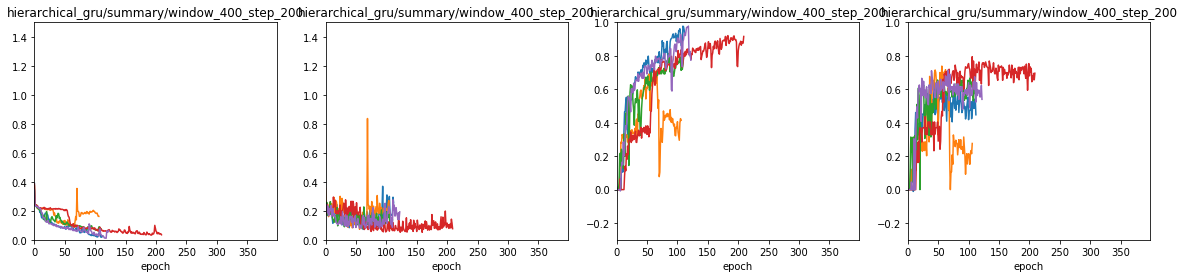

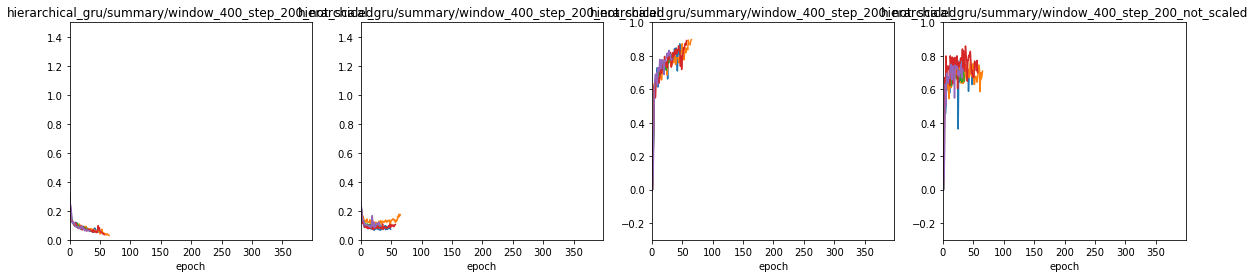

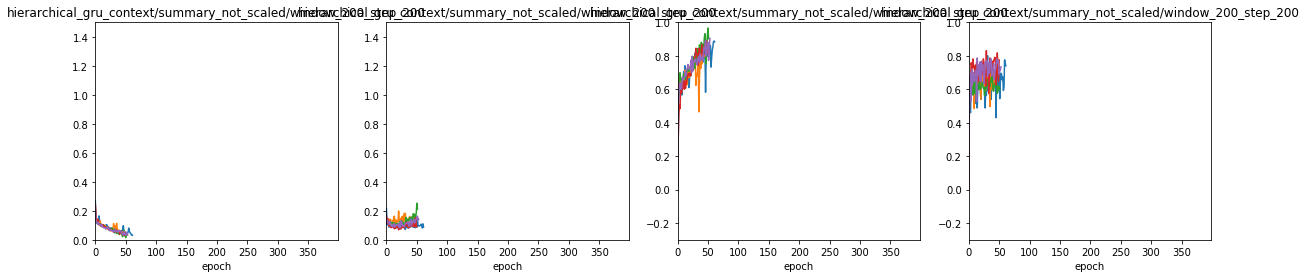

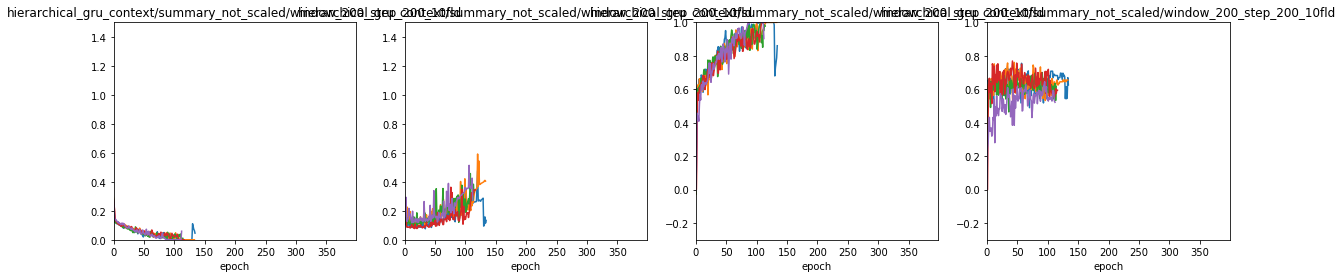

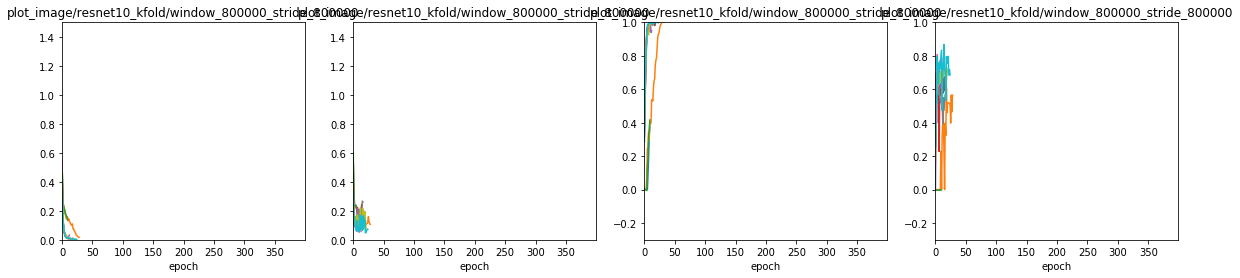

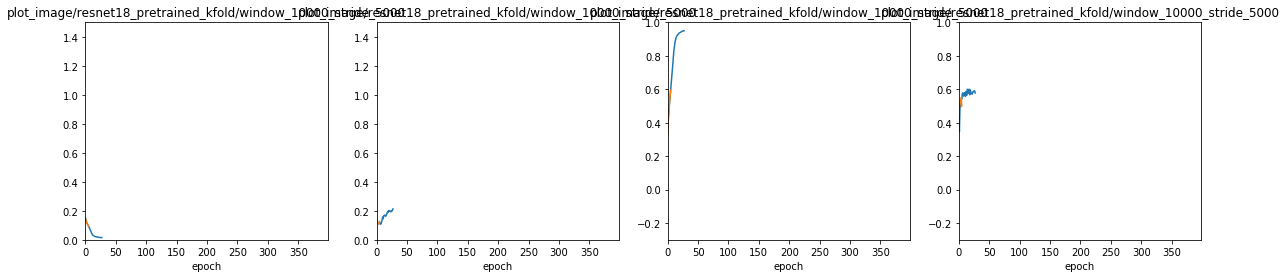

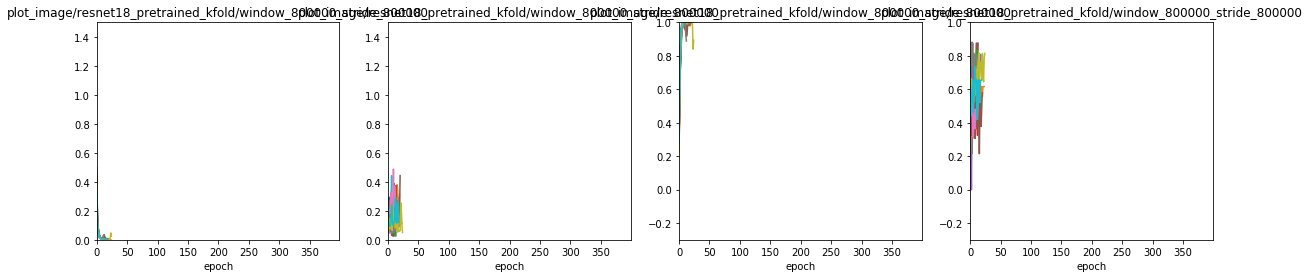

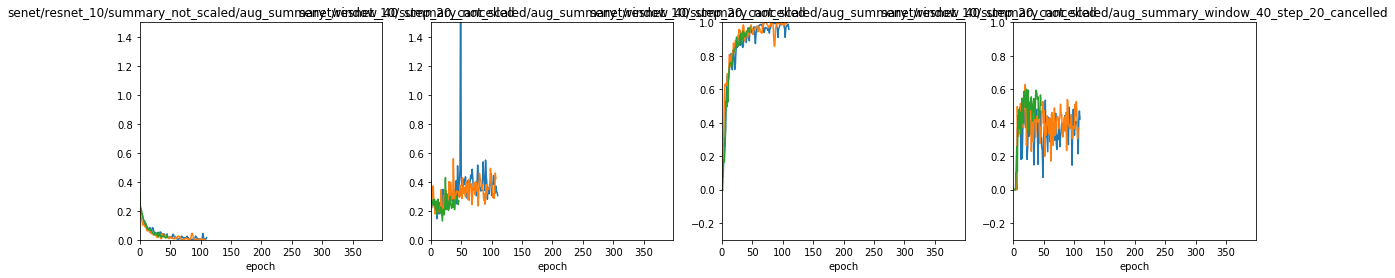

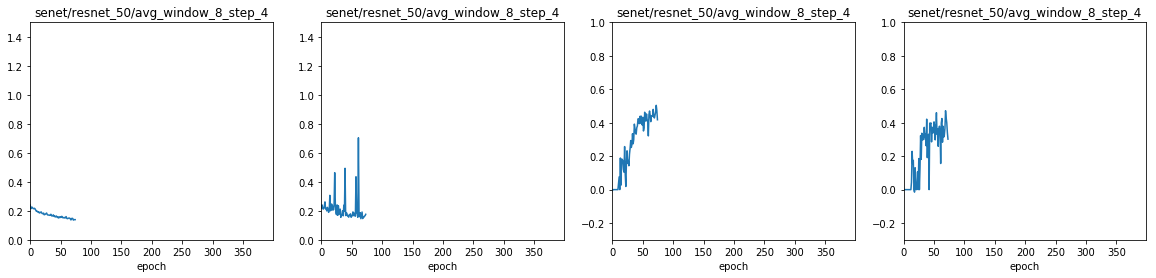

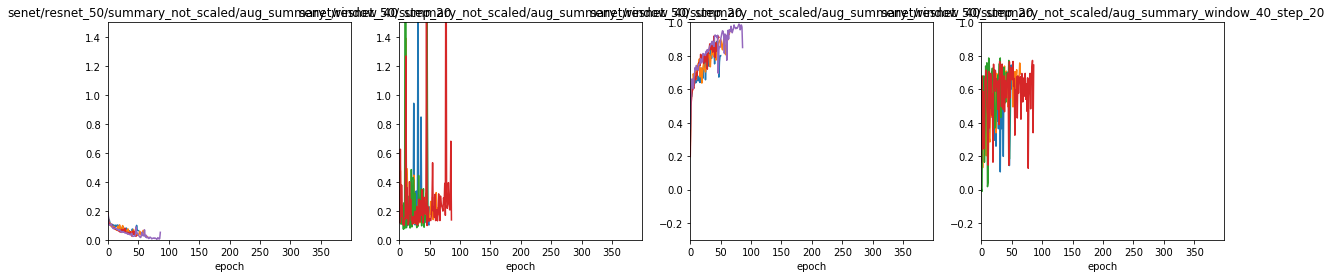

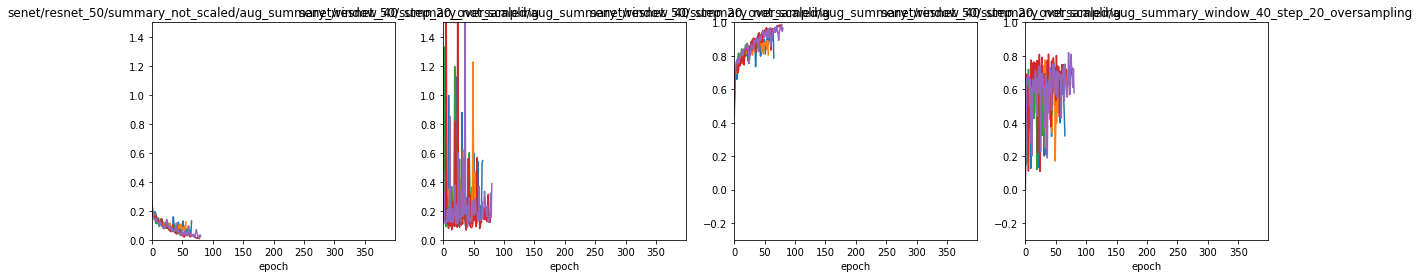

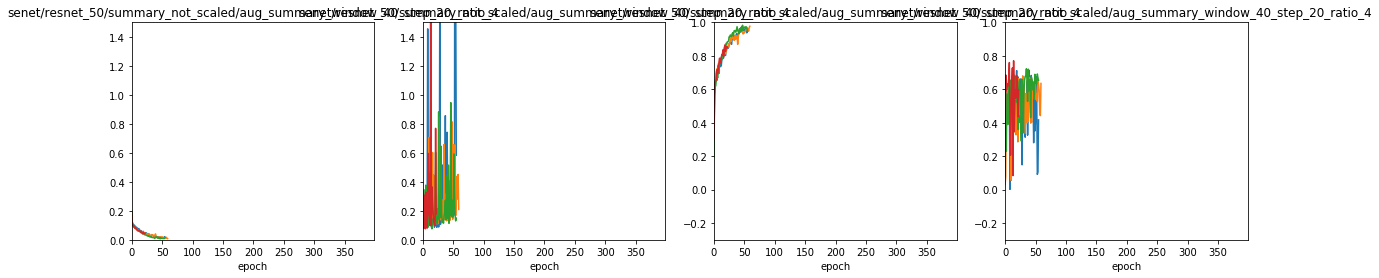

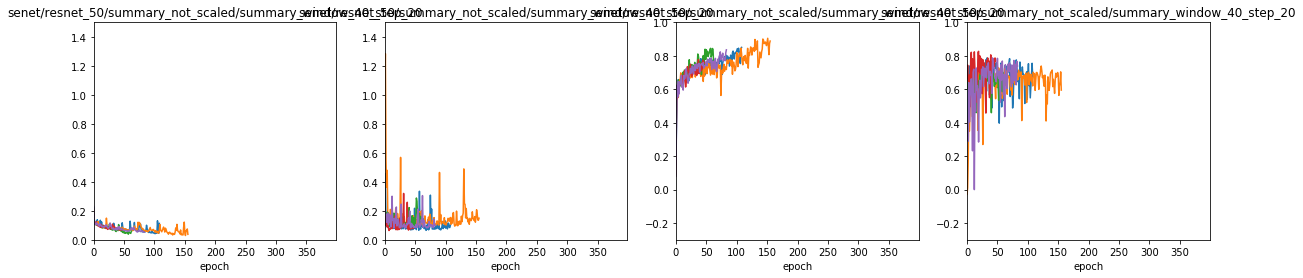

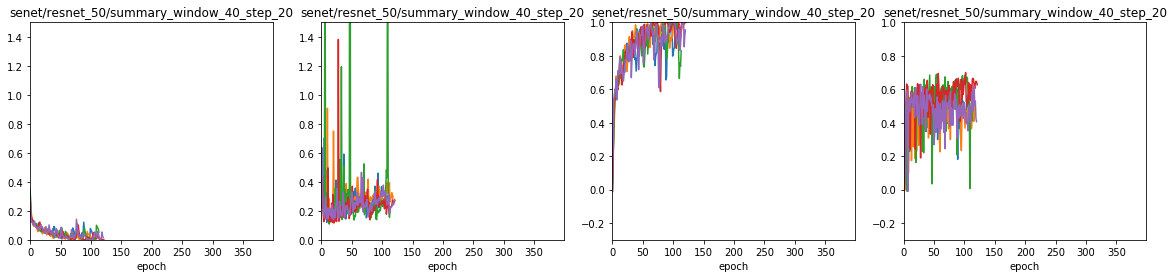

In [31]:
for model_name in sorted(model_cvs.keys()):
    train_columns = [col for col in result_table.columns if model_name + "-cv" in col and "train_loss" in col]
    valid_columns = [col for col in result_table.columns if model_name + "-cv" in col and "valid_loss" in col]
    train_score_columns = [col for col in result_table.columns if model_name + "-cv" in col and "train_score" in col]
    valid_score_columns = [col for col in result_table.columns if model_name + "-cv" in col and "valid_score" in col]
    
    if not len(train_columns) or not len(valid_columns): 
        continue
    figs, axes = plt.subplots(ncols=4, figsize=(20, 4))
    result_table[["epoch"] + train_columns].plot(x="epoch", y=train_columns, title=model_name, ylim=(0, 1.5), ax=axes[0], legend=False)
    result_table[["epoch"] + valid_columns].plot(x="epoch", y=valid_columns, title=model_name, ylim=(0, 1.5), ax=axes[1], legend=False)
    result_table[["epoch"] + train_score_columns].plot(x="epoch", y=train_score_columns, ylim=(-0.3, 1), title=model_name, ax=axes[2], legend=False)
    result_table[["epoch"] + valid_score_columns].plot(x="epoch", y=valid_score_columns, ylim=(-0.3, 1), title=model_name, ax=axes[3], legend=False)
    display(axes)